# Misceláneas: "Widgets" y algunos cabos sueltos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Algunas funciones útiles de Numpy

### Vectorización de funciones escalares

Si bien en **Numpy** las funciones están vectorizadas, hay ocasiones en que las funciones son el resultado de una simulación, optimización, o integración, y si bien la paralelización puede ser trivial, no puede ser utilizada directamente con un vector. Para ello existe la función `vectorize()`. Veamos un ejemplo, calculando la función *coseno()* como la integral del *seno()*

In [2]:
from scipy import integrate

In [3]:
def mi_cos(t):
  return 1-integrate.quad(np.sin, 0, t)[0]

Para calcular sobre un conjunto de datos, debemos realizar una iteración llamando a esta función en cada paso:


In [4]:
x = np.linspace(-np.pi,np.pi,30)

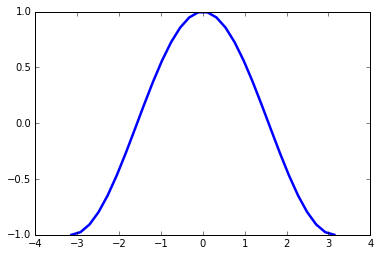

In [5]:
y = np.zeros(x.size)
for i in np.arange(y.size):
  y[i] = mi_cos(x[i])
plt.plot(x,y)

Como conveniencia, para evitar tener que hacer explícitamente el bucle `for` existe la función `vectorize`, que convierte a una función que toma y devuelve escalares, en una función que acepta arrays:

In [6]:
coseno = np.vectorize(mi_cos)

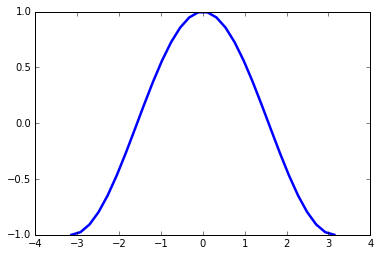

In [7]:
plt.plot(x, coseno(x), '-')

Un segundo ejemplo podría ser la función que hicimos para calcular $\pi$ utilizando el método de Monte Carlo

In [8]:
def estima_pi(N):
  y = np.random.random((2, N))
  c = np.square(y).sum(axis=0) < 1
  return 4 * c.sum() / N
pi_areas = np.vectorize(estima_pi)

In [9]:
estima_pi(1000)

3.0760000000000001

In [10]:
N = 1000*np.ones(10, dtype='int')
print('N=', N)
print('shape=', N.shape)
pi_areas(N)

N= [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
shape= (10,)


array([ 3.072,  3.184,  3.068,  3.224,  3.164,  3.072,  3.12 ,  3.14 ,
        3.168,  3.088])

Estimación de π ≅ 3.1411 ± 0.0163


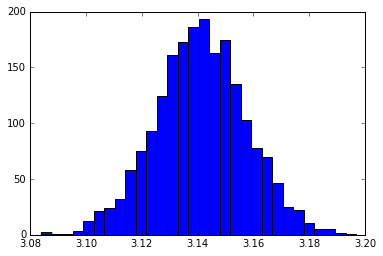

In [11]:
Ns = 10000 * np.ones(2000, dtype=int)
y = pi_areas(Ns)
pi = y.mean()
error = y.std()
print('Estimación de π ≅ {:.4f} ± {:.4f}'.format(pi, error))
d= plt.hist(y,bins=30)

### Unir (o concatenar) *array*

Si queremos unir dos *arrays* para formar un tercer *array* **Numpy** tiene una función llamada `concatenate`, que recibe una secuencia de arrays y devuelve su unión a lo largo de un eje

In [12]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8], [9,10]])
print('a=\n',a)
print('b=\n',b)

a=
 [[1 2]
 [3 4]]
b=
 [[ 5  6]
 [ 7  8]
 [ 9 10]]


In [13]:
np.concatenate((a, b), axis=0)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [14]:
np.concatenate((a, b))          # axis=0 es el default

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [15]:
np.vstack((a, b))               # Une siempre verticalmente (primer eje)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

Veamos cómo utilizar esto cuando tenemos más dimensiones. 

In [16]:
c = np.array([[[1, 2], [3, 4]],[[-1,-2],[-3,-4]]])
d = np.array([[[5, 6], [7, 8]], [[9,10], [-5, -6]], [[-7, -8], [-9,-10]]])
print('c: shape={}\n'.format(c.shape),c)
print('\nd: shape={}\n'.format(d.shape),d)


c: shape=(2, 2, 2)
 [[[ 1  2]
  [ 3  4]]

 [[-1 -2]
  [-3 -4]]]

d: shape=(3, 2, 2)
 [[[  5   6]
  [  7   8]]

 [[  9  10]
  [ -5  -6]]

 [[ -7  -8]
  [ -9 -10]]]


Como tienen todas las dimensiones iguales, excepto la primera, podemos concatenarlos a lo largo del eje 0 (verticalmente)

In [17]:
np.vstack((c,d))

array([[[  1,   2],
        [  3,   4]],

       [[ -1,  -2],
        [ -3,  -4]],

       [[  5,   6],
        [  7,   8]],

       [[  9,  10],
        [ -5,  -6]],

       [[ -7,  -8],
        [ -9, -10]]])

In [18]:
e=np.concatenate((c,d),axis=0)

In [19]:
print(e.shape)
print(e)

(5, 2, 2)
[[[  1   2]
  [  3   4]]

 [[ -1  -2]
  [ -3  -4]]

 [[  5   6]
  [  7   8]]

 [[  9  10]
  [ -5  -6]]

 [[ -7  -8]
  [ -9 -10]]]


Si tratamos de concatenar `a`y `b` a lo largo de otro eje vamos a recibir un error porque la forma de los `arrays` no es compatible.

In [20]:
b.T

array([[ 5,  7,  9],
       [ 6,  8, 10]])

In [21]:
print(a.shape, b.shape, b.T.shape)

(2, 2) (3, 2) (2, 3)


In [22]:
np.concatenate((a, b.T), axis=1)

array([[ 1,  2,  5,  7,  9],
       [ 3,  4,  6,  8, 10]])

In [23]:
np.hstack((a,b.T))              # Como vstack pero horizontalmente

array([[ 1,  2,  5,  7,  9],
       [ 3,  4,  6,  8, 10]])

### Enumerate para `ndarrays`

Para iterables en **Python** existe la función enumerate que devuelve una tupla con el índice y el valor. En **Numpy** existe un iterador multidimensional llamado `ndenuerate()`

In [24]:
print(b)

[[ 5  6]
 [ 7  8]
 [ 9 10]]


In [25]:
for i, x in np.ndenumerate(b):
  print(i,'->',x)

(0, 0) -> 5
(0, 1) -> 6
(1, 0) -> 7
(1, 1) -> 8
(2, 0) -> 9
(2, 1) -> 10


### Convertir a unidimensional (ravel)


In [26]:
a

array([[1, 2],
       [3, 4]])

In [27]:
np.ravel(a)

array([1, 2, 3, 4])

In [28]:
np.ravel(b)

array([ 5,  6,  7,  8,  9, 10])

In [29]:
np.ravel(d)

array([  5,   6,   7,   8,   9,  10,  -5,  -6,  -7,  -8,  -9, -10])

`ravel` tiene un argumento opcional 'order'

In [30]:
np.ravel(a, order='C')          # order='C' es el default 

array([1, 2, 3, 4])

In [31]:
np.ravel(a, order='F')

array([1, 3, 2, 4])

## Un poco más sobre imágenes

In [32]:
from scipy import misc

El siguiente ejemplo es de las pruebas que hicimos en el laboratorio de medición de flujo en toberas

La imagen "imag1" es del tipo: <class 'numpy.ndarray'> con "shape" (272, 652, 3)


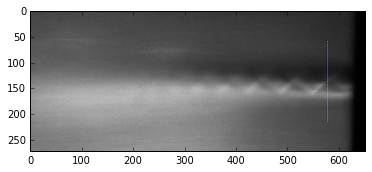

In [34]:
imag1= misc.imread('figuras/imagen_flujo.jpg')
print('La imagen "imag1" es del tipo:', type(imag1), 'con "shape"', imag1.shape)
plt.imshow(imag1);

La representación de la imagen es una matriz, donde cada elemento corresponde a un pixel, y cada pixel tiene tres valores

In [35]:
print(imag1[0,0:2])                    # Veamos los primeros dos elementos
print(imag1.max())                     # y el máximo

[[65 65 65]
 [66 66 66]]
255


Vemos que cada elemento es un entero entre 0 y 255.
El submódulo `misc` tiene algunas funciones de conveniencia para trabajar sobre imágenes

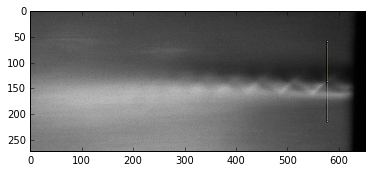

In [36]:
imag2 = misc.imfilter(imag1,'sharpen') # Aplica un filtro
plt.imshow(imag2);

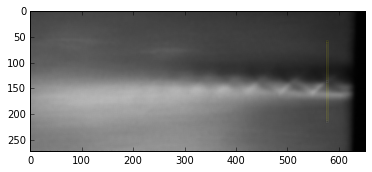

In [37]:
plt.imshow(misc.imfilter(imag1, 'blur'))

Como tenemos una figura en escala de grises vamos a convertir los tres colores a una simple escala. Esto se puede hacer cuando leemos el archivo:

In [38]:
img3= misc.imread("figuras/imagen_flujo.jpg", flatten=True)
print(type(img3))
print(img3.shape)

<class 'numpy.ndarray'>
(272, 652)


Hemos convertido a la imagen RGB en una imagen en grises, y tenemos un valor simple por cada pixel.

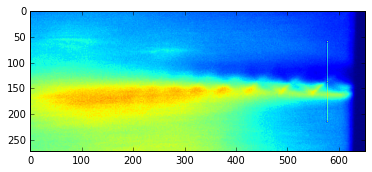

In [39]:
plt.imshow(img3)

¿Qué pasó acá? `imshow()` está interpretando el valor de cada pixel como una posición en una cierta escala de colores (**colormap**). Como no especificamos cuál queremos utilizar, se usó el cmap *default*. Especifiquemos otros:

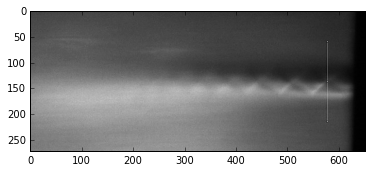

In [40]:
plt.imshow(img3, cmap='gray')

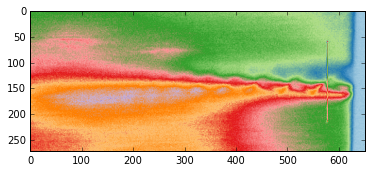

In [41]:
plt.imshow(img3, cmap='Paired')

La referencia de ubicación de los `cmap` existentes está en:
http://matplotlib.org/examples/color/colormaps_reference.html

Trabajemos un poco sobre la imagen

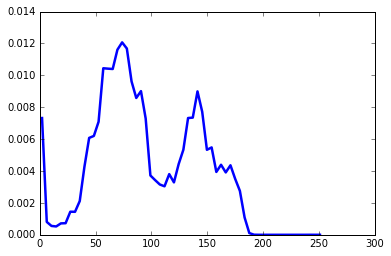

In [42]:
hist, bin_edges = np.histogram(img3, bins=60, normed=True)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
plt.plot(bin_centers, hist);

In [43]:
img=  misc.imfilter( img3,'sharpen') # Aplicamos un filtro

Creemos una imagen binaria (blanco o negro), y una degradada:

In [44]:
limit= 115
binary_img= img > limit
degrad_img= (img//32)*32

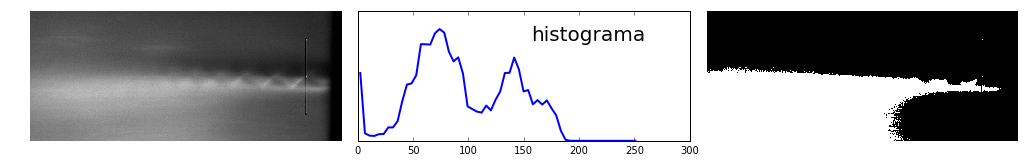

In [45]:
# Creamos una figura con tres gráficos
fig, ax= plt.subplots(figsize=(14,2), ncols=3)
ax[0].imshow(img, cmap=plt.cm.gray, interpolation='nearest')
ax[0].axis('off')
ax[1].plot(bin_centers, hist, lw=2)
ax[1].text(157, .9*hist.max(), 'histograma', fontsize=20)
ax[1].set_yticks([])
ax[2].imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
ax[2].axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)

Comparemos los histogramas de la imagen original, con los de la imagen degradada

posición en eje x= 507


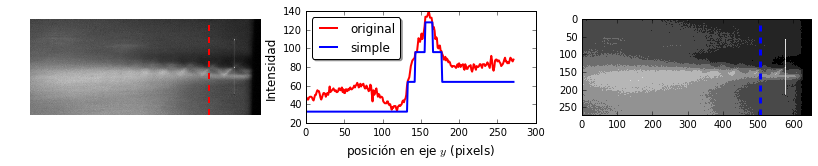

In [46]:
x0 = int(img.shape[1]*7/9)      # Elegimos un punto en el eje x
print('posición en eje x=',x0)
plt.figure(figsize=(14,2))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
plt.axvline(x0, color='r', ls='--', lw=2)
plt.axis('off')
plt.subplot(132)
line = img[:,x0]
line1 = degrad_img[:,x0]
plt.plot(line,'r-', lw=2, label='original')
plt.plot(line1,'b-', lw=2, label='simple')
plt.xlabel(u'posición en eje $y$ (pixels)')
plt.ylabel('Intensidad')
plt.legend(loc='best')
plt.subplot(133)
plt.imshow(degrad_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axvline(x0, color='b', ls='--', lw=3);

## Widgets

Veamos cómo se puede hacer este tipo de trabajo en forma interactiva. Para ello **Matplotlib** tiene un submódulo `widgets` que están diseñados para funcionar con cualquier *backend* interactivo. (más información en: http://matplotlib.org/api/widgets_api.html)


Empecemos estudiando como agregar un marcador de cursor

### Cursor

In [ ]:
# %load scripts/ejemplo_cursor.py
from matplotlib.widgets import Cursor
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

x, y = 4 * (np.random.rand(2, 100) - .5)
ax.plot(x, y, 'o')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# set useblit = True on gtkagg for enhanced performance
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

plt.show()


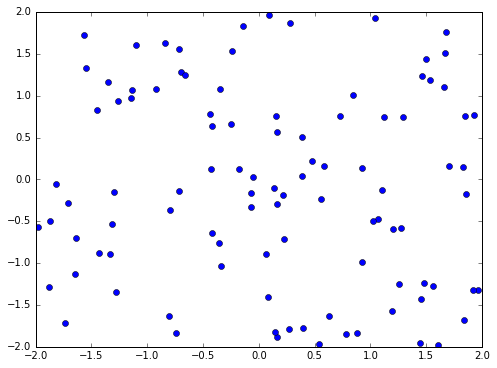

In [48]:
# %load scripts/ejemplo_cursor.py
from matplotlib.widgets import Cursor
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

x, y = 4 * (np.random.rand(2, 100) - .5)
ax.plot(x, y, 'o')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# set useblit = True on gtkagg for enhanced performance
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

plt.show()

### Manejo de eventos

Es importante obtener datos de la interacción con el gráfico. Esto se llama "Event handling".

Para recibir *events* necesitamos **escribir y conectar** una función que se activa cuando ocurre el evento (*callback*). Veamos un ejemplo simple pero importante, donde imprimimos las coordenadas donde se presiona el *mouse*.

In [ ]:
# %load scripts/ejemplo_callback.py
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))


def onclick(event):
  print('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
        (event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)


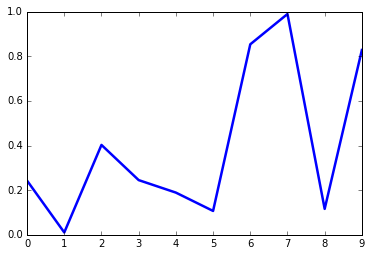

In [50]:
# %load scripts/ejemplo_callback.py
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))


def onclick(event):
  print('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
        (event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)


El método `mpl_connect` del objeto `canvas` realiza la conección de la función (que aquí llamamos `onclick`) con la figura. Más información en http://matplotlib.org/users/event_handling.html.

### Ejemplo integrado

In [ ]:
# %load scripts/analizar_figura_1.py

# import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from matplotlib.widgets import Cursor

img = misc.imread('../figuras/imagen_flujo.png', flatten=True)
ymax = img.max()


def click(event):
  """Secuencia:
  1. Encuentro el punto donde el mouse hizo 'click'
  2. Le doy valores a la línea vertical
  3. Le doy valores a la curva en el grafico de la derecha
  4. y 5. Grafico los nuevos valores
  """
  x0 = event.xdata
  l1.set_data([[x0, x0], [0., 1.]])
  l2.set_data(range(img.shape[0]), img[:, x0])
  l1.figure.canvas.draw()
  l2.figure.canvas.draw()


# Defino la figura
fig = plt.figure(figsize=(12, 4))

# Agrego el primer grafico y le dibujo la imagen
ax = fig.add_subplot(121, axisbg='#FFFFCC')
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

# Agrego la línea inicial en un valor inicial
x0 = 100
l1 = ax.axvline(x0, color='r', ls='--', lw=3)

# Grafico de la derecha
ax2 = plt.subplot(122)
l2, = ax2.plot(img[:, x0], 'r-', lw=2, label='corte')
ax2.set_ylim((0, ymax))
ax2.set_xlabel(u'posición en eje $y$ (pixels)')
ax2.set_ylabel('Intensidad')
ax2.legend(loc='best')

plt.tight_layout()

# Agrego el cursor y conecto la accion de presionar a la funcion click
cursor = Cursor(ax, horizOn=False, vertOn=True, useblit=True, color='blue', linewidth=1)
fig.canvas.mpl_connect('button_press_event', click)


plt.show()


In [ ]:
# %load scripts/analizar_figura_2.py

# import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from matplotlib.widgets import Cursor

img = misc.imread('../figuras/imagen_flujo.png', flatten=True)
ymax = img.max()


def click(event):
  """Secuencia:
  1. Encuentro el punto donde el mouse hizo 'click'
  2. Le doy valores a la línea vertical
  3. Le doy valores a la curva en el grafico de la derecha
  4. y 5. Grafico los nuevos valores
  """
  # global x0
  x0 = event.xdata
  n0 = int(x0)
  l1.set_data([[n0, n0], [0., 1.]])
  l2.set_data(range(img.shape[0]), img[:, n0])
  leg2.texts[0].set_text('corte en {:.1f}'.format(x0))
  l1.figure.canvas.draw()
  l2.figure.canvas.draw()


# Defino la figura
fig = plt.figure(figsize=(12, 4))

# Agrego el primer grafico y le dibujo la imagen
ax = fig.add_subplot(121, axisbg='#FFFFCC')
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
# Agrego la línea inicial en un valor inicial
x0 = 100
l1 = ax.axvline(x0, color='r', ls='--', lw=3)

# Grafico de la derecha
ax2 = plt.subplot(122)
l2, = ax2.plot(img[:, x0], 'r-', lw=2, label='corte en {:.1f}'.format(x0))
ax2.set_ylim((0, ymax))
ax2.set_xlabel(u'posición en eje $y$ (pixels)')
ax2.set_ylabel('Intensidad')
leg2 = ax2.legend(loc='best')

plt.tight_layout()
# Agrego el cursor y conecto la accion de presionar a la funcion click
cursor = Cursor(ax, horizOn=False, vertOn=True, useblit=True, color='blue', linewidth=1)
fig.canvas.mpl_connect('button_press_event', click)


plt.show()
